<a href="https://colab.research.google.com/github/shreyah/Survey_mixeddata_analysis/blob/main/Exploratory_Data_Analysis_Siyer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Here we have two waves of a consumer survey conducted in the UK between 2020 and 2021. An hotel company has come to you wanting to understand the various dynamics of the UK market when it comes to travel and hospitality. They would like to start a chain of hotels next year in the UK. The area of interest is domestic tourism in the UK and they want to understand broadly in their market/category where something could be interesting. What can we tell them just based on the data we have? Things to explore (for ideas but feel free to choose your own):



1.   Clustering to find groups which are based on their travel habits.
2.   Are there any distinct audiences you can see to target on Google/Social Media?
3. Can you spot anything interesting in terms of trends when you look at the two waves?
4. Anything else you think is interesting?
5. Are there questions you think are missing that would be useful?


Furthermore, please create a supervised classification model using as the target the "v0154_etra_travelbookings#1" variable. You can go about it however you like using whatever features you want. The survey data is in Travel_survey.csv, ID_ItemLabel_dict.json will map column headings to the actual question text, and MP_Columns_dict.json will map column heading options to their actual text values.

What's being tested: Your ability to sift through data to find answers to the question at hand. Your ability to think of questions not asked by the client. We are also looking at the depth of your statistical knowledge and analytical skills. The final thing we want to see is a strong ability to tell a compelling story using data visualization tools. Knowledge of dashboard platforms is a bonus (Tableau, Plotly). If not, please use a neatly formatted Jupyter Notebook or a slide deck as your output. The quality of your code will also be assessed so feel free to augment this with additional data you think useful if you like (macroeconomic factors, census info)

Tech. you should consider: Jupyter Notebook, Plotly, Tableau, GitHub, GitLab



#Importing dependencies

In [ ]:
!pip install umap-learn
!pip install umap-learn[plot]

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import json
import io
from google.colab import files
import matplotlib.pyplot as plt
import umap
import umap.plot 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from  sklearn.preprocessing import LabelEncoder

In [ ]:
uploaded = files.upload()

Saving ID_ItemLabel_dict.json to ID_ItemLabel_dict.json
Saving MP_Columns_dict.json to MP_Columns_dict.json
Saving Travel_survey.csv to Travel_survey.csv


In [ ]:
travel_survey= pd.read_csv('Travel_survey.csv')
travel_survey.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (92) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,v9915_demo_children,wave,v0013_demo_agecat,v0154_etra_travelbookings#1,v9917_demo_rental,v0157_etra_brandsflights#2,v9992_demo_migration#1,v9990_demo_income2gbr,v0553_mobi_brandcar,v0151_etra_frequencytravel1,v0574_mobi_frequency#1,v0159_etra_travelbookingsoff#1,v9912_demo_profession,v0560a_mobi_drivetechnologies,v9993b_demo_religion,v9930c_life_values#1,v8880_demo_optimism,qudo_id,v9920b_demo_ethnicitygbr,v0558_mobi_carsatisfaction,v0562_mobi_commuting,v0049_life_devicesinternet#1,v0559_mobi_carchange,v0152_etra_frequencytravel2,v9995_demo_incomepersonal,v9994_demo_incomecountry,v9996_demo_politiccountry#1,v0045_demo_regiongbr,GV_14#10,GV_14#100,GV_14#11,GV_14#12,GV_14#13,GV_14#14,GV_14#15,GV_14#16,GV_14#17,GV_14#18,GV_14#19,GV_14#20,...,GV_230#28,GV_230#29,GV_230#3,GV_230#4,GV_230#5,GV_230#6,GV_230#7,GV_230#8,GV_230#9,GV_231,GV_233,GV_253,GV_335,GV_339#1,GV_339#10,GV_339#11,GV_339#12,GV_339#13,GV_339#14,GV_339#15,GV_339#16,GV_339#18,GV_339#19,GV_339#2,GV_339#20,GV_339#24,GV_339#3,GV_339#4,GV_339#5,GV_339#6,GV_339#7,GV_339#8,GV_339#9,GV_339#9999,GV_401,GV_559#1,GV_559#2,GV_559#3,GV_559#4,GV_559#5
0,no children,1.0,55 - 64 years,0.0,I live in my own house,-99.0,0.0,£ 43 200 up to less than £ 57 600,-99.0,2-3 times,not at all,0.0,full-time employed,-99.0,Christianity,0.0,neither optimistic nor pessimistic,id_19,White,-99.0,less than 15 minutes,1.0,-99.0,not at all,neither positive nor negative,neither positive nor negative,0.0,"West Midlands, England",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,I'm not studying/haven't studied at univ./college,I'm not studying/haven't studied,-99,"up to £3,000",-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,0.0,0.0,0.0,0.0,0.0
1,no children,1.0,35 - 44 years,1.0,I live in a rented house,-99.0,0.0,£ 31 200 up to less than £ 43 200,Peugeot,once,not at all,1.0,full-time employed,gasoline,Christianity,0.0,fairly optimistic,id_20,White,very satisfied,15 to 29 minutes,0.0,very unlikely,not at all,negative,negative,1.0,"South West, England",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,humanities/languages,2008,-99,"up to £3,000",-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,other,0.0,0.0,0.0,0.0,0.0
2,no children,2.0,45 - 54 years,0.0,I live in my own house,0.0,0.0,£ 43 200 up to less than £ 57 600,Honda,2-3 times,not at all,0.0,full-time employed,gasoline,I'm non-religious,0.0,neither optimistic nor pessimistic,id_24,White,very satisfied,less than 15 minutes,0.0,likely,not at all,neither positive nor negative,negative,0.0,"North West, England",-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,I'm not studying/haven't studied at univ./college,I'm not studying/haven't studied,-99,"£3,001-£4,999",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-99,0.0,0.0,0.0,0.0,0.0
3,2 children,1.0,25 - 34 years,0.0,I live in a rented house,0.0,1.0,£ 19 200 up to less than £ 22 800,Škoda,2-3 times,not at all,0.0,part-time employed,diesel,would rather not say,0.0,fairly optimistic,id_33,White,neither satisfied nor dissatisfied,30 to 59 minutes,0.0,neither likely nor unlikely,not at all,negative,negative,1.0,"East Midlands, England",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,law,2010,-99,-99,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,I do not work in the public sector,0.0,0.0,0.0,0.0,0.0
4,no children,1.0,25 - 34 years,0.0,I live in a rented apartment,0.0,0.0,£ 22 800 up to less than £ 31 200,Hyundai,2-3 times,not at all,0.0,full-time employed,gasoline,Christianity,0.0,neither optimistic nor pessimi

In [ ]:
file_name = "ID_ItemLabel_dict.json"
file_name_2= "MP_Columns_dict.json"
columndata =json.loads(uploaded[file_name].decode("utf-8"))
columnvals =json.loads(uploaded[file_name_2].decode("utf-8"))
cols_ls = travel_survey.columns.to_list()

#Data Inspection

In [ ]:
#Populating the survey questions and results answered
for i,v in enumerate(cols_ls):
  
  if '#' not in v:   
    if str(v) in columndata:
      print('Column: {0} Question :{1}'.format(v,columndata.get(v)))

  else:
    if str(v.split("#")[0]) in columndata:
      print('Column: {0} Question :{1}'.format(v,columndata.get(v.split("#")[0])))
      
    if str(v) in columnvals:
      print('Responses:',columnvals.get(v))
  

In [ ]:
travel_survey.describe().T

,count,mean,std,min,25%,50%,75%,max
wave,2096.0,1.499523,0.500119,1.0,1.0,1.0,2.0,2.0
v0154_etra_travelbookings#1,2096.0,0.255248,0.436105,0.0,0.0,0.0,1.0,1.0
v0157_etra_brandsflights#2,2096.0,-63.316317,47.568151,-99.0,-99.0,-99.0,0.0,1.0
v9992_demo_migration#1,2096.0,0.063454,0.243836,0.0,0.0,0.0,0.0,1.0
v0159_etra_travelbookingsoff#1,2096.0,0.316794,0.465337,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
GV_559#1,2096.0,-0.005248,2.172616,-99.0,0.0,0.0,0.0,1.0
GV_559#2,2096.0,0.066317,2.188032,-99.0,0.0,0.0,0.0,1.0
GV_559#3,2096.0,0.074427,2.189625,-99.0,0.0,0.0,0.0,1.0
GV_559#4,2096.0,0.084924,2.191640,-99.0,0.0,0.0,0.0,1.0


In [ ]:
for v in col_val_tr:
  print('column data value:',columnvals.get(v))


In [ ]:
#filter rows by people who have'nt travelled abroad and removing junk values 
travel_survey_mod = travel_survey[travel_survey['GV_133#99']==1].reset_index(drop=True)
travel_survey_2 = travel_survey_mod.copy()

In [ ]:
#Before going to data exploration and analysis is to make sure the data doesn’t contain missing values.
# Check missing value
travel_survey.isna().sum()

In [ ]:
#Null value Imputation using Interpolation Method
travel_survey['GV_559#1']=travel_survey['GV_559#1'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
#Check missing value
travel_survey.isna().sum()

In [ ]:
travel_survey_mod['v0154_etra_travelbookings#1'].value_counts()

0.0    368
1.0     67
Name: v0154_etra_travelbookings#1, dtype: int64

#Data Distribution with Bar Plots

[Text(0, 0, 'Other modes'), Text(0, 0, 'Trains')]

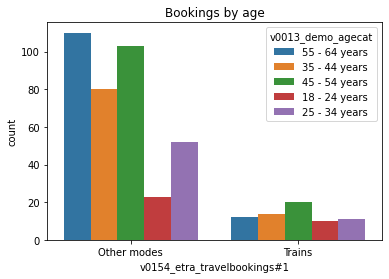

In [ ]:
# Checking for gender related bias in the dataset
#print(travel_survey_mod['v0013_demo_agecat'].value_counts())
f = sns.countplot(x='v0154_etra_travelbookings#1', data=travel_survey_mod, hue='v0013_demo_agecat')
f.set_title("Bookings by age")
f.set_xticklabels(['Other modes', 'Trains'])

no children           300
1 child                72
2 children             45
3 children             12
4 children              5
5 or more children      1
Name: v9915_demo_children, dtype: int64


[Text(0, 0, 'Other modes'), Text(0, 0, 'Trains')]

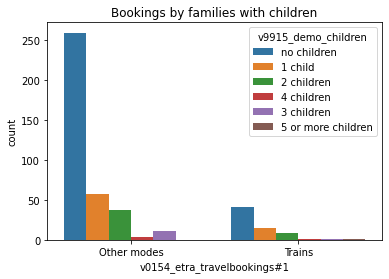

In [ ]:
  # Checking for gender related bias in the dataset
print(travel_survey_mod['v9915_demo_children'].value_counts())
f = sns.countplot(x='v0154_etra_travelbookings#1', data=travel_survey_mod, hue='v9915_demo_children')
f.set_title("Bookings by families with children")
f.set_xticklabels(['Other modes', 'Trains'])
#plt.rcParams["figure.figsize"] = (2,2)

It can be seen that those with no children have opted for travel on train and the number of children can influence the travel option

In [ ]:
df_no_Child= travel_survey_mod.loc[travel_survey_mod['v9915_demo_children'].str.contains("no children")].reset_index(drop=True)


In [ ]:
def plot_heatmap(data, cmap=['Reds', 'Greens', 'Blues', 'Greys'], figsize=(12,6)):
    fig = plt.figure(figsize=figsize)
    for i in range(len(data.index)):
        ax = fig.add_subplot(5,1,i+1)
        sns.heatmap(pd.DataFrame(data.iloc[i,:]).transpose(), cbar=False, cmap=cmap[i], annot=True, fmt='.1%', linewidth=0.5)
        ax.set_xlabel('')
        plt.yticks(rotation=360)
        if i < (len(data.index)-1):
            ax.set_xticklabels('')
    plt.subplots_adjust(hspace=0.01)


##Visualizing Mode of Travel

### By Train

In [ ]:
# Checking for age related bias in the dataset

def train_count_plot(df,y:str,title:str):
  f = sns.countplot(x='v0154_etra_travelbookings#1', data=df, hue=y)
  f.set_title("Train bookings by {} distribution".format(title))
  f.set_xticklabels(['Other modes', 'Trains'])

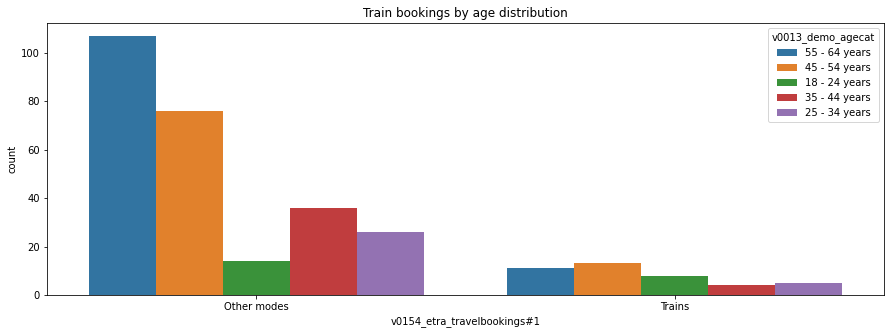

In [ ]:
train_count_plot(df_no_Child,"v0013_demo_agecat","age")

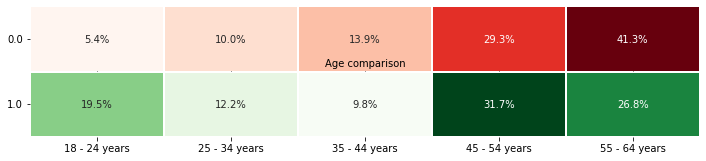

In [ ]:
df_age_ct = pd.crosstab(index=df_no_Child['v0154_etra_travelbookings#1'], columns=df_no_Child['v0013_demo_agecat'], values=df_no_Child['v0013_demo_agecat'], aggfunc='count') 
df_age_pct = df_age_ct.div(df_age_ct.sum(axis=1), axis=0)
# Plot
plot_heatmap(data = df_age_pct)
plt.title('Age comparison', size=10)
plt.show()

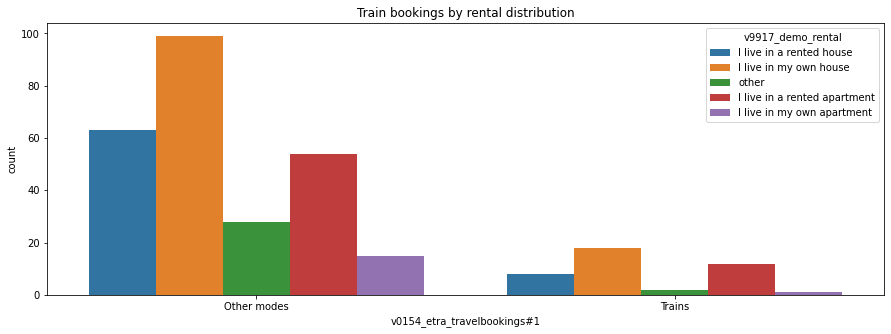

In [ ]:
train_count_plot(df_no_Child,"v9917_demo_rental","rental")

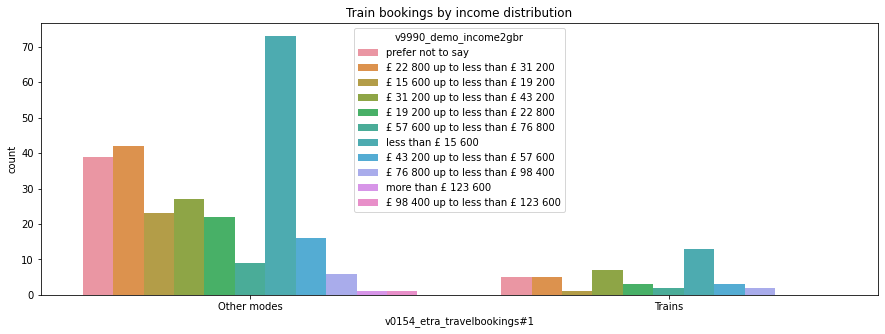

In [ ]:
train_count_plot(df_no_Child,"v9990_demo_income2gbr","income")

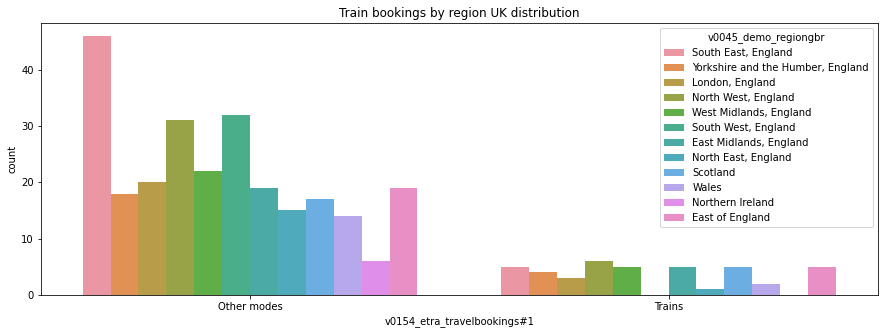

In [ ]:
train_count_plot(df_no_Child,"v0045_demo_regiongbr","region UK")

Those in England,Scotland prefer to take the train and places like Wales,Ireland have few train commuters

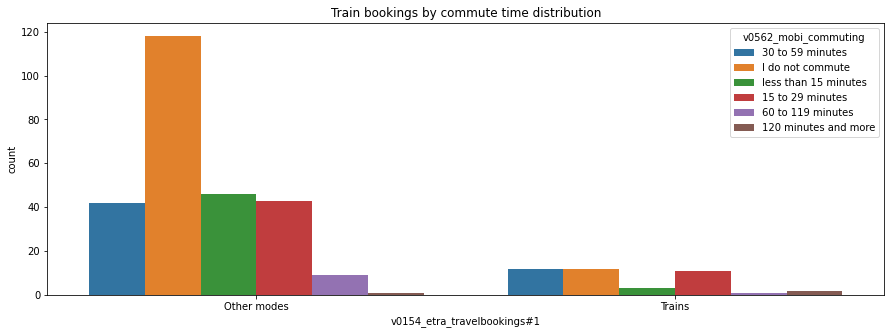

In [ ]:
# Checking for type of commuting time related bias in the dataset
train_count_plot(df_no_Child,"v0562_mobi_commuting","commute time")

In [ ]:
travel_survey_2

,v9915_demo_children,wave,v0013_demo_agecat,v0154_etra_travelbookings#1,v9917_demo_rental,v0157_etra_brandsflights#2,v9992_demo_migration#1,v9990_demo_income2gbr,v0553_mobi_brandcar,v0151_etra_frequencytravel1,v0574_mobi_frequency#1,v0159_etra_travelbookingsoff#1,v9912_demo_profession,v0560a_mobi_drivetechnologies,v9993b_demo_religion,v9930c_life_values#1,v8880_demo_optimism,qudo_id,v9920b_demo_ethnicitygbr,v0558_mobi_carsatisfaction,v0562_mobi_commuting,v0049_life_devicesinternet#1,v0559_mobi_carchange,v0152_etra_frequencytravel2,v9995_demo_incomepersonal,v9994_demo_incomecountry,v9996_demo_politiccountry#1,v0045_demo_regiongbr,GV_14#10,GV_14#100,GV_14#11,GV_14#12,GV_14#13,GV_14#14,GV_14#15,GV_14#16,GV_14#17,GV_14#18,GV_14#19,GV_14#20,...,GV_230#28,GV_230#29,GV_230#3,GV_230#4,GV_230#5,GV_230#6,GV_230#7,GV_230#8,GV_230#9,GV_231,GV_233,GV_253,GV_335,GV_339#1,GV_339#10,GV_339#11,GV_339#12,GV_339#13,GV_339#14,GV_339#15,GV_339#16,GV_339#18,GV_339#19,GV_339#2,GV_339#20,GV_339#24,GV_339#3,GV_339#4,GV_339#5,GV_339#6,GV_339#7,GV_339#8,GV_339#9,GV_339#9999,GV_401,GV_559#1,GV_559#2,GV_559#3,GV_559#4,GV_559#5
0,5,2.0,4,0.0,1,-99.0,0.0,2,12,3,3,0.0,4,3,0,0.0,1,306,3,6,2,0.0,3,4,3,2,1.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10,36,0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,1.0,0.0
1,0,2.0,2,0.0,3,-99.0,0.0,6,0,0,3,0.0,0,0,1,0.0,1,410,3,0,3,0.0,0,4,1,1,0.0,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,13,2,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,1.0,0.0
2,5,2.0,4,0.0,3,-99.0,0.0,5,25,1,3,0.0,3,3,1,0.0,3,66,3,4,2,1.0,3,4,2,2,1.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,0.0,0.0,0.0,1.0,0.0
3,5,2.0,4,0.0,3,-99.0,0.0,3,27,3,3,1.0,4,4,2,0.0,3,116,3,6,4,0.0,6,4,2,1,1.0,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,36,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0
4,5,1.0,3,0.0,3,-99.0,0.0,6,4,4,3,0.0,5,3,0,0.0,2,119,3,3,2,0.0,3,4,1,2,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,11,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,5,1.0,4,0.0,3,-99.0,0.0,0,10,0,3,0.0,9,3,0,0.0,2,99,3,6,4,0.0,1,4,2,3,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,36,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0,1.0,0.0,0.0
431,1,1.0,2,0.0,3,-99.0,0.0,8,27,1,3,1.0,0,3,0,0.0,1,100,3,6,1,0.0,6,4,3,2,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,15,0,7,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,10,0.0,0.0,0.0,0.0,0.0
432,1,1.0,1,0.0,3,-99.0,0.0,0,28,4,3,0.0,3,3,1,0.0,4,101,3,6,4,0.0,1,4,2,2,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,20,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0
433,2,1.0,0,0.0,1,-99.0,0.0,5,10,0,3,0.0,3,3,0,1.0,0,102,3,4,5,0.0,2,2,2,3,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1,25,0,1,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99

In [ ]:
df_cols =['v9915_demo_children','v0013_demo_agecat','v9917_demo_rental','v9990_demo_income2gbr','v0151_etra_frequencytravel1',
          'v9912_demo_profession','v8880_demo_optimism','v0562_mobi_commuting','v0152_etra_frequencytravel2','v9995_demo_incomepersonal',
          'v0045_demo_regiongbr']
travel_survey_3 = travel_survey_2.copy()

#Clustering 
## All features
 
 Can you spot anything interesting in terms of trends when you look at the two waves?

In [ ]:
# Encode Categorical Columns
le = LabelEncoder()
travel_survey_2[df_cols] = travel_survey_2[df_cols].apply(le.fit_transform)


In [ ]:
objList = travel_survey_2.select_dtypes(include = "object").columns
print (objList)
for feat in objList:
    travel_survey_2[feat] = le.fit_transform(travel_survey_2[feat].astype(str))

print (travel_survey_2.info())
le_df=travel_survey_2.apply(LabelEncoder().fit_transform)
le_df

Index([], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Columns: 437 entries, v9915_demo_children to GV_559#5
dtypes: float64(388), int64(49)
memory usage: 1.5 MB
None


,v9915_demo_children,wave,v0013_demo_agecat,v0154_etra_travelbookings#1,v9917_demo_rental,v0157_etra_brandsflights#2,v9992_demo_migration#1,v9990_demo_income2gbr,v0553_mobi_brandcar,v0151_etra_frequencytravel1,v0574_mobi_frequency#1,v0159_etra_travelbookingsoff#1,v9912_demo_profession,v0560a_mobi_drivetechnologies,v9993b_demo_religion,v9930c_life_values#1,v8880_demo_optimism,qudo_id,v9920b_demo_ethnicitygbr,v0558_mobi_carsatisfaction,v0562_mobi_commuting,v0049_life_devicesinternet#1,v0559_mobi_carchange,v0152_etra_frequencytravel2,v9995_demo_incomepersonal,v9994_demo_incomecountry,v9996_demo_politiccountry#1,v0045_demo_regiongbr,GV_14#10,GV_14#100,GV_14#11,GV_14#12,GV_14#13,GV_14#14,GV_14#15,GV_14#16,GV_14#17,GV_14#18,GV_14#19,GV_14#20,...,GV_230#28,GV_230#29,GV_230#3,GV_230#4,GV_230#5,GV_230#6,GV_230#7,GV_230#8,GV_230#9,GV_231,GV_233,GV_253,GV_335,GV_339#1,GV_339#10,GV_339#11,GV_339#12,GV_339#13,GV_339#14,GV_339#15,GV_339#16,GV_339#18,GV_339#19,GV_339#2,GV_339#20,GV_339#24,GV_339#3,GV_339#4,GV_339#5,GV_339#6,GV_339#7,GV_339#8,GV_339#9,GV_339#9999,GV_401,GV_559#1,GV_559#2,GV_559#3,GV_559#4,GV_559#5
0,5,1,4,0,1,0,0,2,12,3,3,0,4,3,0,0,1,306,3,6,2,0,3,4,3,2,1,7,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,2,1,1,10,36,0,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,0,0,0,1,0
1,0,1,2,0,3,0,0,6,0,0,3,0,0,0,1,0,1,410,3,0,3,0,0,4,1,1,0,2,1,1,1,1,1,2,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,6,13,2,7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,0,0,0,1,0
2,5,1,4,0,3,0,0,5,25,1,3,0,3,3,1,0,3,66,3,4,2,1,3,4,2,2,1,7,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,2,1,1,5,0,0,0,1,0
3,5,1,4,0,3,0,0,3,27,3,3,1,4,4,2,0,3,116,3,6,4,0,6,4,2,1,1,11,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,36,0,8,1,1,1,1,1,1,1,1,2,1,1,2,1,2,1,1,1,1,2,1,1,1,0,0,0,1,0
4,5,0,3,0,3,0,0,6,4,4,3,0,5,3,0,0,2,119,3,3,2,0,3,4,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,2,2,1,1,1,2,11,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,5,0,4,0,3,0,0,0,10,0,3,0,9,3,0,0,2,99,3,6,4,0,1,4,2,3,0,6,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,2,2,1,1,1,1,36,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,0,0,1,0,0
431,1,0,2,0,3,0,0,8,27,1,3,1,0,3,0,0,1,100,3,6,1,0,6,4,3,2,0,3,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,12,15,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0
432,1,0,1,0,3,0,0,0,28,4,3,0,3,3,1,0,4,101,3,6,4,0,1,4,2,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,...,2,1,1,1,1,1,1,1,1,1,20,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,0,0,0,0,0
433,2,0,0,0,1,0,0,5,10,0,3,0,3,3,0,1,0,102,3,4,5,0,2,2,2,3,0,4,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0


In [ ]:
X, y = le_df.drop("wave", axis=1), le_df[["wave"]].values.flatten()
#X,y

In [ ]:
# Preprocess
pipe = make_pipeline(SimpleImputer(strategy="mean"))
X = pipe.fit_transform(X.copy())

manifold = umap.UMAP(n_neighbors=10,
                      min_dist=.5,
                      metric='correlation').fit(X,y)
X_reduced = manifold.transform(X)
X_reduced.shape

(435, 2)

In [ ]:
hover_data = pd.DataFrame({'index':np.arange(435),
                           'label':travel_survey_2['wave'],
                           'political_opinion':travel_survey_2['v9996_demo_politiccountry#1'],
                           'travel Freq':travel_survey_2['v0151_etra_frequencytravel1']})
hover_data['item'] = hover_data.label.map(
    {
        1:'wave1',
        2: 'wave2',
    }

)

#Using UMAP to cluster
UMAP is a dimensionality reduction tool for machine learning to visualize and understand large, high dimensional datasets. As the dataset has several features, other dimensionality reduction techniques such as t-SNE suffers with a larger dataset.

UMAP also tries to preserve the data's global structure much better.

In [ ]:
umap.plot.output_notebook()

In [ ]:
from bokeh.plotting import show, save, output_notebook, output_file

# Finally, we create the plot
p = umap.plot.interactive(manifold, labels=travel_survey_2['wave'], hover_data=hover_data, point_size=8)
show(p)

As I increased the n_neighbors to 6 from 2, the wave1 and wave 2 turned into a two mutually exclusive cluster. As UMAP connects more and more neighboring points when constructing the graph representation of the high-dimensional data, which leads to a projection that more accurately reflects the global structure of the data. 

At very low values i.e less than 5, any notion of global structure is almost completely lost. 



It can be seen that wave1 and wave2 are mutually exclusive clusters

#Feature Importance
Plotting the most relevent features based on their importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
%matplotlib inline   
#function to plot feature importance    
def featureimp_plt(df,x_ft,model,n):
    X, y = df.drop(x_ft, axis=1), df[[x_ft]].values.flatten()
    model.fit(X, y)
    z=(pd.Series(model.feature_importances_, index=X.columns)
      .nlargest(n)
      .plot(kind='barh'))
    return X,y,z


#### Field v0154_etra_travelbookings 
By plotting the feature importance of the field "v0154_etra_travelbookings" which describes the travel model gives high importance it can be seen the most relevant field is "v0159_etra_travelbookingsoff#1" and these two columns are the same "





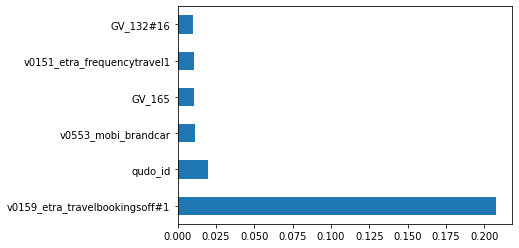

In [ ]:
x_ft="v0154_etra_travelbookings#1"
X, y,z = featureimp_plt(le_df,x_ft,model,6)

#### Field wave
In the 2 waves, the v9996_demo_politiccountry feature has the highest importance 

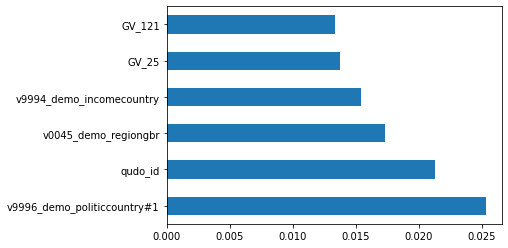

In [ ]:
x_ft="wave"
X, y,z = featureimp_plt(le_df,x_ft,model,6)

#### By travel preference
From feature importance of GV_132#15 , where those who prefer to go on a long weekend get away seem to prefer go on :


1.   sightseeing
2.   lakes and mountians
3.   visiting friends & family
4.   Beach holiday





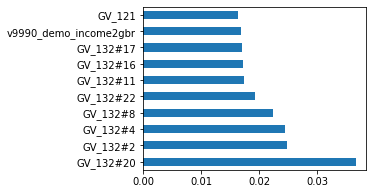

In [ ]:
x_ft="GV_132#15"
X, y,z = featureimp_plt(le_df,x_ft,model,10)

### Clustering the mosted relevent fields by feature dependence map

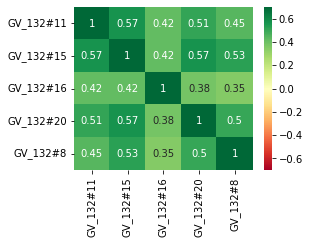

In [ ]:
le_df_fil= le_df[le_df.columns[le_df.columns.isin(['GV_132#15', 'GV_132#20','GV_132#11',
                                                   'GV_132#8','GV_132#16'])]]                                         
# Heat map distribution to see correlation between features

heat_map = sns.heatmap(le_df_fil.corr(), cmap = 'RdYlGn',annot=True,vmax = 0.7, vmin = -0.7)
heat_map.set_xticklabels(heat_map.get_xticklabels());
plt.rcParams["figure.figsize"] = (4,3)

In [ ]:
X, y = le_df_fil.drop("GV_132#15", axis=1), le_df_fil[["GV_132#15"]].values.flatten()
X,y
# Preprocess
pipe = make_pipeline(SimpleImputer(strategy="mean"))
X = pipe.fit_transform(X.copy())

manifold = umap.UMAP(n_neighbors=15,
                      min_dist=0.8,
                      metric='correlation').fit(X,y)
X_reduced = manifold.transform(X)
X_reduced.shape

(435, 2)

In [ ]:
hover_data_2 = pd.DataFrame({'index':np.arange(435),
                           'label':le_df_fil['GV_132#15'],
                          'getway_sightseeing':le_df_fil['GV_132#20'],
                          'Lakes_mountains':le_df_fil['GV_132#11'] })
hover_data_2['item'] = hover_data_2.label.map(
    {
        1:'No weekend get away',
        2: 'weekend get away',
        3: 'val -99.0'
    })
hover_data_2['GV_132#20'] = hover_data_2.getway_sightseeing.map(
    {
        1:'No Sightseeing',
        2: 'Sightseeing',
        0: 'val -99.0'
    })
hover_data_2['GV_132#11'] = hover_data_2.Lakes_mountains.map(
    {
        1:'No lakes and mountains',
        2: 'lakes and mountains',
        0: 'val -99.0'
    }

)
hover_data_2=hover_data_2.drop(['getway_sightseeing','label','Lakes_mountains'],axis=1)

In [ ]:
# Finally, we create the plot
umap.plot.output_notebook()
p = umap.plot.interactive(manifold, labels=le_df_fil['GV_132#15'], hover_data=hover_data_2, point_size=8,background ='black')
show(p)

#Target Group

Can be targetted based on region, preferences like gaming ,betting preferences

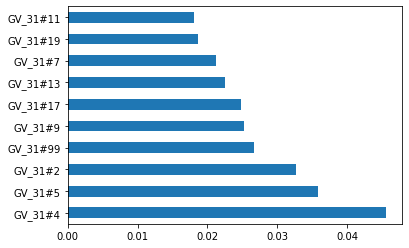

In [ ]:

X, y = le_df.drop("GV_31#1", axis=1), le_df[["GV_31#1"]].values.flatten()
X,y


model = RandomForestClassifier()
model.fit(X, y)

(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh'))

Incase of people who prefer to do betting in can be seen that : 

1.   do not participate
2.   virtual greyhound racing
3.   online poker
4.   car race betting

It can be seen that a signicant amount of people who prefer to do online betting could be targetted through social media platform





In [ ]:
Services= pd.read_csv('Services & eServices_survey.csv')
colssur_ls = Services.columns.to_list()
Services

,v9993c_demo_religion,v0013d_demo_agecat,v0443d_inte_social,v0356f_eser_usageservices,v9990c_demo_income_5#1,v0013e_demo_agecat,v9992b_demo_migration,v0364b_eser_moneyprof,v9912c_demo_profession,v9917b_demo_rental,v9994b_demo_incomecountry,v0356a_eser_onlineservices#1,v0361b_eser_appsfithealth,v9990d_demo_income_6,v0356j_eser_onlineservices,v0356e_eser_usageservices,v0354b_eser_usagedating,qudo_id,v9915a_demo_household,v0356b_eser_usageservices,v9917c_demo_rental,v0443c_inte_social,v0356d_eser_usageservices,v0356c_eser_usageservices,v0013c_demo_agecat,v0013g_demo_generation,v0049b_life_devicesinternet,v0443b_inte_social,wave,v9992d_demo_migrationregion,v0356k_eser_onlineservices,v0045b_demo_regiongbr,v9930c_life_values#1,v9993b_demo_religion,v0356g_eser_usageservices,v9912b_demo_profession,v9990b_demo_income3gbr,v8880b_demo_optimism,v0356h_eser_onlineservices,v9995b_demo_incomepersonal,...,GV_230#28,GV_230#29,GV_230#3,GV_230#4,GV_230#5,GV_230#6,GV_230#7,GV_230#8,GV_230#9,GV_231,GV_233,GV_253,GV_335,GV_339#1,GV_339#10,GV_339#11,GV_339#12,GV_339#13,GV_339#14,GV_339#15,GV_339#16,GV_339#18,GV_339#19,GV_339#2,GV_339#20,GV_339#24,GV_339#3,GV_339#4,GV_339#5,GV_339#6,GV_339#7,GV_339#8,GV_339#9,GV_339#9999,GV_401,GV_559#1,GV_559#2,GV_559#3,GV_559#4,GV_559#5
0,would rather not say,40 - 49 years,instant messaging user,restaurant and food delivery user,-99.0,45 - 49 years,would rather not say,professional training purchaser,working (full-time employed / part-time employ...,owned house / apartment,negative,0.0,non-purchaser (online),no household income information,event tickets purchaser (online),fitness and health services user,non-user,id_1,large family (more than 2 children),service user,rented / owned house,social network user,event tickets purchaser,non-user,40 - 49 years,Generation X (Baby Bust) (1965-1979),mobile and stationary user (smartphone / deskt...,social media user,1.0,other / no answer,non-booker (online),England,0.0,would rather not say,professional training user,full-time employed,prefer not to say,neither/don't know,service online booker,neither/don't know,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,medical,1994,-99,10000.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,nurse,0.0,0.0,0.0,0.0,0.0
1,non-religious/atheist,50 - 59 years,non-user,restaurant and food delivery user,0.0,55 - 59 years,no migrant background,non-purchaser,working (full-time employed / part-time employ...,owned house / apartment,negative,0.0,non-purchaser (online),medium income (mid 33% of households),non-purchaser (online),non-user,non-user,id_3,other,service user,rented / owned house,social network user,non-purchaser,non-user,50 - 64 years,Baby Boomer (1946-1964),mobile and stationary user (smartphone / deskt...,social media user,1.0,Europe & Central Asia,non-booker (online),Northern Ireland,0.0,I am an atheist,non-user,full-time employed,US$ 30 840 up to less than US$ 42 120,neither/don't know,service online booker,neither/don't know,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,I'm not studying/haven't studied at univ./college,I'm not studying/haven't studied,-99,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,I do not work in the public sector,0.0,1.0,0.0,0.0,0.0
2,non-religious/atheist,40 - 49 years,instant messaging user,restaurant and food delivery user,-99.0,45 - 49 years,no migrant background,non-purchaser,working (full-time employed / part-time employ...,rented house / apartment,negative,0.0,non-purchaser (online),no household income information,event tickets purchaser (online),fitness and health services user,non-user,id_4,other,service user,rented / owned house,social network user,event tickets purchaser,non-user,40 - 49 years,Generation X (Baby Bust) (1965-1979),mobile and stationary user (smartphone / deskt...,social media user,1.0,Europe & Central Asia,fitness and health services booker (online),England,0

## Data Inspection

In [ ]:
#Populating the survey questions and results answered
for i,v in enumerate(colssur_ls):
  
  if '#' not in v:   
    if str(v) in columndata:
      print('Column: {0} Question :{1}'.format(v,columndata.get(v)))

  else:
    if str(v.split("#")[0]) in columndata:
      print('Column: {0} Question :{1}'.format(v,columndata.get(v.split("#")[0])))
      
    if str(v) in columnvals:
      print('Responses:',columnvals.get(v))
  

Column: v9993c_demo_religion Question :Recode based on "Religion"
Column: v0013d_demo_agecat Question :"How old are you?"
Column: v0443d_inte_social Question :Recode based on "Social media usage by platform type"
Column: v0356f_eser_usageservices Question :Recode based on "Service usage"
Column: v9990c_demo_income_5#1 Question :Recode based on "Monthly/annual household income (local currency)"
Responses: top 10% of households
Column: v0013e_demo_agecat Question :"How old are you?"
Column: v9992b_demo_migration Question :Recode based on "Migrant background"
Column: v0364b_eser_moneyprof Question :Recode based on "Professional training purchases"
Column: v9912c_demo_profession Question :Recode based on "Employment status"
Column: v9917b_demo_rental Question :Recode based on "Current living situation"
Column: v9994b_demo_incomecountry Question :Recode based on "Country's economic situation (detailed)"
Column: v0356a_eser_onlineservices#1 Question :"Which of the following services have you

In [ ]:
# Encode Categorical Columns
Services_mod = Services.copy()
Services_mod[colssur_ls] = Services_mod[colssur_ls].apply(le.fit_transform)
#Services_mod

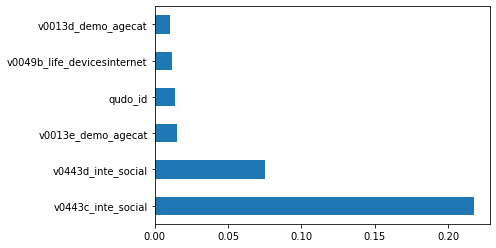

In [ ]:
X, y = Services_mod.drop("v0443d_inte_social", axis=1), Services_mod[["v0443d_inte_social"]].values.flatten()
x_ft="v0443b_inte_social"
X, y,z = featureimp_plt(Services_mod,x_ft,model,6)

# Are there any distinct audiences you can see to target on Google/Social Media?

Using feature importance, it can be seen that social media users have the following features palying a significant role:

1.   Use of social networking
 
2.  Instant messaging app 

3.  Age


It would be benifical to target ads to these groups
